# COGS 108 - Final Project 

# Overview of Money + ? = Obesity 

We are dealing with 3 datasets which are obesity, income, healthcare expense. Since we have to compare obesity vs. income and obesity vs. healthcare, there will be two different data cleaning,  data visualization sections that corresponds to the comparison.

# Names

- Min Liu
- Yoo Jin Chung
- Qin Li
- Cesar Reyes
- Phi Nguyen

## Group Members IDs

- A92061065
- A14692760
- A13803098
- A14078314
- A14145338

# Research Question

##### 1. Can we find a correlative relationship between money and obesity?
##### 2. If so, how could money influence obesity? Is it through household income/medical expense?




## Background and Prior Work

The obesity epidemic continues to be a prevalent health issue in the US as the rate of obesity climbs every year. While there are substantial efforts being made towards treating this issue, there is still unclear evidence of its success since it still affects 34% of adults [1].

Obesity is now considered a chronic disease by the National Institute of Health, American Medical Association and many other medical diseases. With this in mind, it is necessary to inquire about the causes of this epidemic in order to better address effective methods towards reducing obesity rates. 

One article about obesity and health expenses piqued our interest in examining economic relationships that may provide insight into the epidemic. According to Estimated Economic Costs of Obesity to U.S. Business [2], “the health cost of obesity to U.S business represents 5% of total medical care costs”. 

Another study from 2011 to 2014 showed a correlation between obesity and income in women but no differences between obesity and income among men [3]. Inspired by these results, we were wondering whether there is a correlation between income and obesity among different regions in the US and examine the costs of health expenditures by state and analyze its relationship to each states obesity rate. 

References (include links):
- [1] Nia, M. et al. (2012) OBESITY: OVERVIEW OF AN EPIDEMIC. Psychiatr Clin North; 34(4): 717–732. doi: 10.1016/j.psc.2011.08.005 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3228640/
- [2] Thompson, D. (1998) Estimated Economic Costs of Obesity to U.S. Business https://journals.sagepub.com/doi/abs/10.4278/0890-1171-13.2.120
- [3] Cynthia, L. et al. (2017) Prevalence of Obesity Among Adults, by Household Income and Education — United States, 2011–2014. Morbidity and Mortality Weekly Report; 66(50);1369–1373. https://www.cdc.gov/mmwr/volumes/66/wr/mm6650a1.htm#T1_down


# Hypothesis


We hypothesize that higher annual income, higher education expenses, and higher medical care expenses will relate to lower obesity rate since theoretically each of them help people to maintain a better lifestyle.

Ideally, we should also be able to see the evolution of each element here along time and region according to the data we collected below.


# Dataset(s)

**Adult Obesity in the United States**
- Data: https://www.stateofobesity.org/adult-obesity/
- 900 observations
- This dataset provides the average rate of adult obesity within 48 states in the US from 1990-2017. It was obtained by  https://www.stateofobesity.org/adult-obesity/, as part of a project initiated by the Trust for America’s Health and the Robert Wood Foundation to raise awareness of the obesity epidemic. Variables include the states observed, the adult obesity rate of that state, and the year observed. 


**Health expenditure per capita (1991 - 2014 with 49 states)**
- Visual: https://www.kff.org/other/state-indicator/health-spending-per-capita/?activeTab=map&currentTimeframe=0&selectedDistributions=health-spending-per-capita&selectedRows=%7B%22states%22:%7B%22all%22:%7B%7D%7D,%22wrapups%22:%7B%22united-states%22:%7B%7D%7D%7D&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
- Data: https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/NationalHealthExpendData/NationalHealthAccountsStateHealthAccountsResidence.html
- 1,200 observations
- Another one of our datasets presents Health Care Expenditures per Capita by State of Residence in a similar fashion, with the healthcare expenditure amount per capita of 50 states from 1991-2014. The data was obtained by the Center for Medicare and Medicaid Services and its variables include the states and years observed, as well as the health spending per capita. Similar data is provided from the dataset from the Henry J Kaiser Family Foundation.


**Median Household Income by State: 1984 to 2017 from Census Bureau**
- Data: http://factfinder.census.gov/bkmk/table/1.0/en/ACS/11_1YR/R1901.US01PRF
- Data (spreadsheet): https://www2.census.gov/programs-surveys/cps/tables/time-series/historical-income-households/h08.xls
- 1650 observations
- Our last dataset provides the median household income by state from 1984-2017 from the Census Bureau. The variables include the state and year observed, medium and medium income with 1650 observations in the data set. The same type of data is also provided by the American Fact Finder.


# Setup

In [39]:
## YOUR CODE HERE
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression


## Obesity and Healthcare

### Data Cleaning and Data Visualization 

Describe your data cleaning steps here.

In [45]:
## Loading datas
## The codes to load the original data sets, After the operation here, the reading values will be numerical 
##
income_summary = pd.read_csv("./household_income/Summary_2017_1984.csv", thousands=',')
income_summary = income_summary.rename(index=str, columns={'State': 'state'})
obesity_summary = pd.read_csv("./obesity_rate.csv")
obesity_summary = obesity_summary.rename(index=str, columns={'States': 'state'})
del obesity_summary['Unnamed: 0']
health_summary = pd.read_csv("./healthcare/healthcare_in_one.csv")
health_summary.head()


,state,2014,2013,2012,2011,2010,2009,2008,2007,2006,...,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991
0,United States,8045,7703,7535,7292,7094,6892,6612,6370,6048,...,4118,3893,3720,3556,3406,3266,3117,2996,2852,2672
1,Alabama,7281,6996,6821,6541,6421,6325,6097,5928,5755,...,3932,3714,3601,3540,3336,3163,2991,2854,2716,2535
2,Alaska,11064,10428,10130,9586,9129,8745,8447,7975,7476,...,4566,4112,3848,3654,3411,3109,2865,2770,2646,2558
3,Arizona,6452,6262,6183,6076,6027,5874,5660,5410,5103,...,3226,3095,2962,2833,2801,2717,2677,2621,2506,2447
4,Arkansas,7408,6929,6804,6585,6412,6238,6000,5766,5469,...,3737,3547,3356,3227,3039,2896,2731,2604,2493,2363


In [46]:
# Obesity data cleaning 
obesity_summary = obesity_summary.T
obesity_summary.index.names = ['Year']
obesity_summary.columns = list(obesity_summary.loc['state',:])
obesity_summary.dropna(axis = 1, inplace = True)
obesity_summary.drop('state', axis = 0, inplace = True) 
obesity_summary.head()


,Mississippi,BAlabama,West Virginia,Tennessee,Louisiana,Kentucky,Oklahoma,South Carolina,Arkansas,Michigan,...,Oregon,Wyoming,Minnesota,Nevada,California,New York,Rhode Island,New Jersey,Montana,Vermont
Year,,,,,,,,,,,,,,,,,,,,,
1990,0.15,0.144,0.144,0.137,0.137,0.133,0.132,0.127,0.123,0.123,...,0.101,0.099,0.099,0.093,0.093,0.09,0.089,0.084,0.081,0.069
1995,0.194,0.183,0.177,0.172,0.17,0.17,0.169,0.166,0.166,0.164,...,0.135,0.134,0.131,0.13,0.129,0.129,0.128,0.128,0.126,0.123
2000,0.239,0.237,0.226,0.226,0.221,0.219,0.217,0.217,0.214,0.211,...,0.173,0.171,0.171,0.17,0.17,0.169,0.166,0.164,0.161,0.16
2003,0.284,0.281,0.277,0.26,0.256,0.252,0.252,0.252,0.25,0.249,...,0.208,0.203,0.202,0.202,0.201,0.201,0.201,0.199,0.199,0.196
2004,0.281,0.277,0.276,0.258,0.256,0.253,0.253,0.253,0.252,0.251,...,0.21,0.209,0.207,0.205,0.203,0.203,0.201,0.199,0.196,0.191


In [47]:
# Statsitical summary of obesity data in each state
stats=pd.DataFrame()
stats["mean"]=obesity_summary.mean()
stats["Std.Dev"]=obesity_summary.std()
stats["Var"]=obesity_summary.var()
stats.T

,Mississippi,BAlabama,West Virginia,Tennessee,Louisiana,Kentucky,Oklahoma,South Carolina,Arkansas,Michigan,...,Oregon,Wyoming,Minnesota,Nevada,California,New York,Rhode Island,New Jersey,Montana,Vermont
mean,0.314167,0.306389,0.301778,0.295611,0.291222,0.288500,0.284778,0.281778,0.279556,0.276889,...,0.232000,0.230722,0.229722,0.227611,0.226222,0.224222,0.221444,0.219056,0.216111,0.212778
Std.Dev,0.064979,0.064802,0.063957,0.065616,0.064457,0.064154,0.061945,0.061452,0.061177,0.060363,...,0.051389,0.051778,0.051721,0.051775,0.051313,0.050780,0.049812,0.050091,0.049642,0.051422
Var,0.004222,0.004199,0.004091,0.004305,0.004155,0.004116,0.003837,0.003776,0.003743,0.003644,...,0.002641,0.002681,0.002675,0.002681,0.002633,0.002579,0.002481,0.002509,0.002464,0.002644


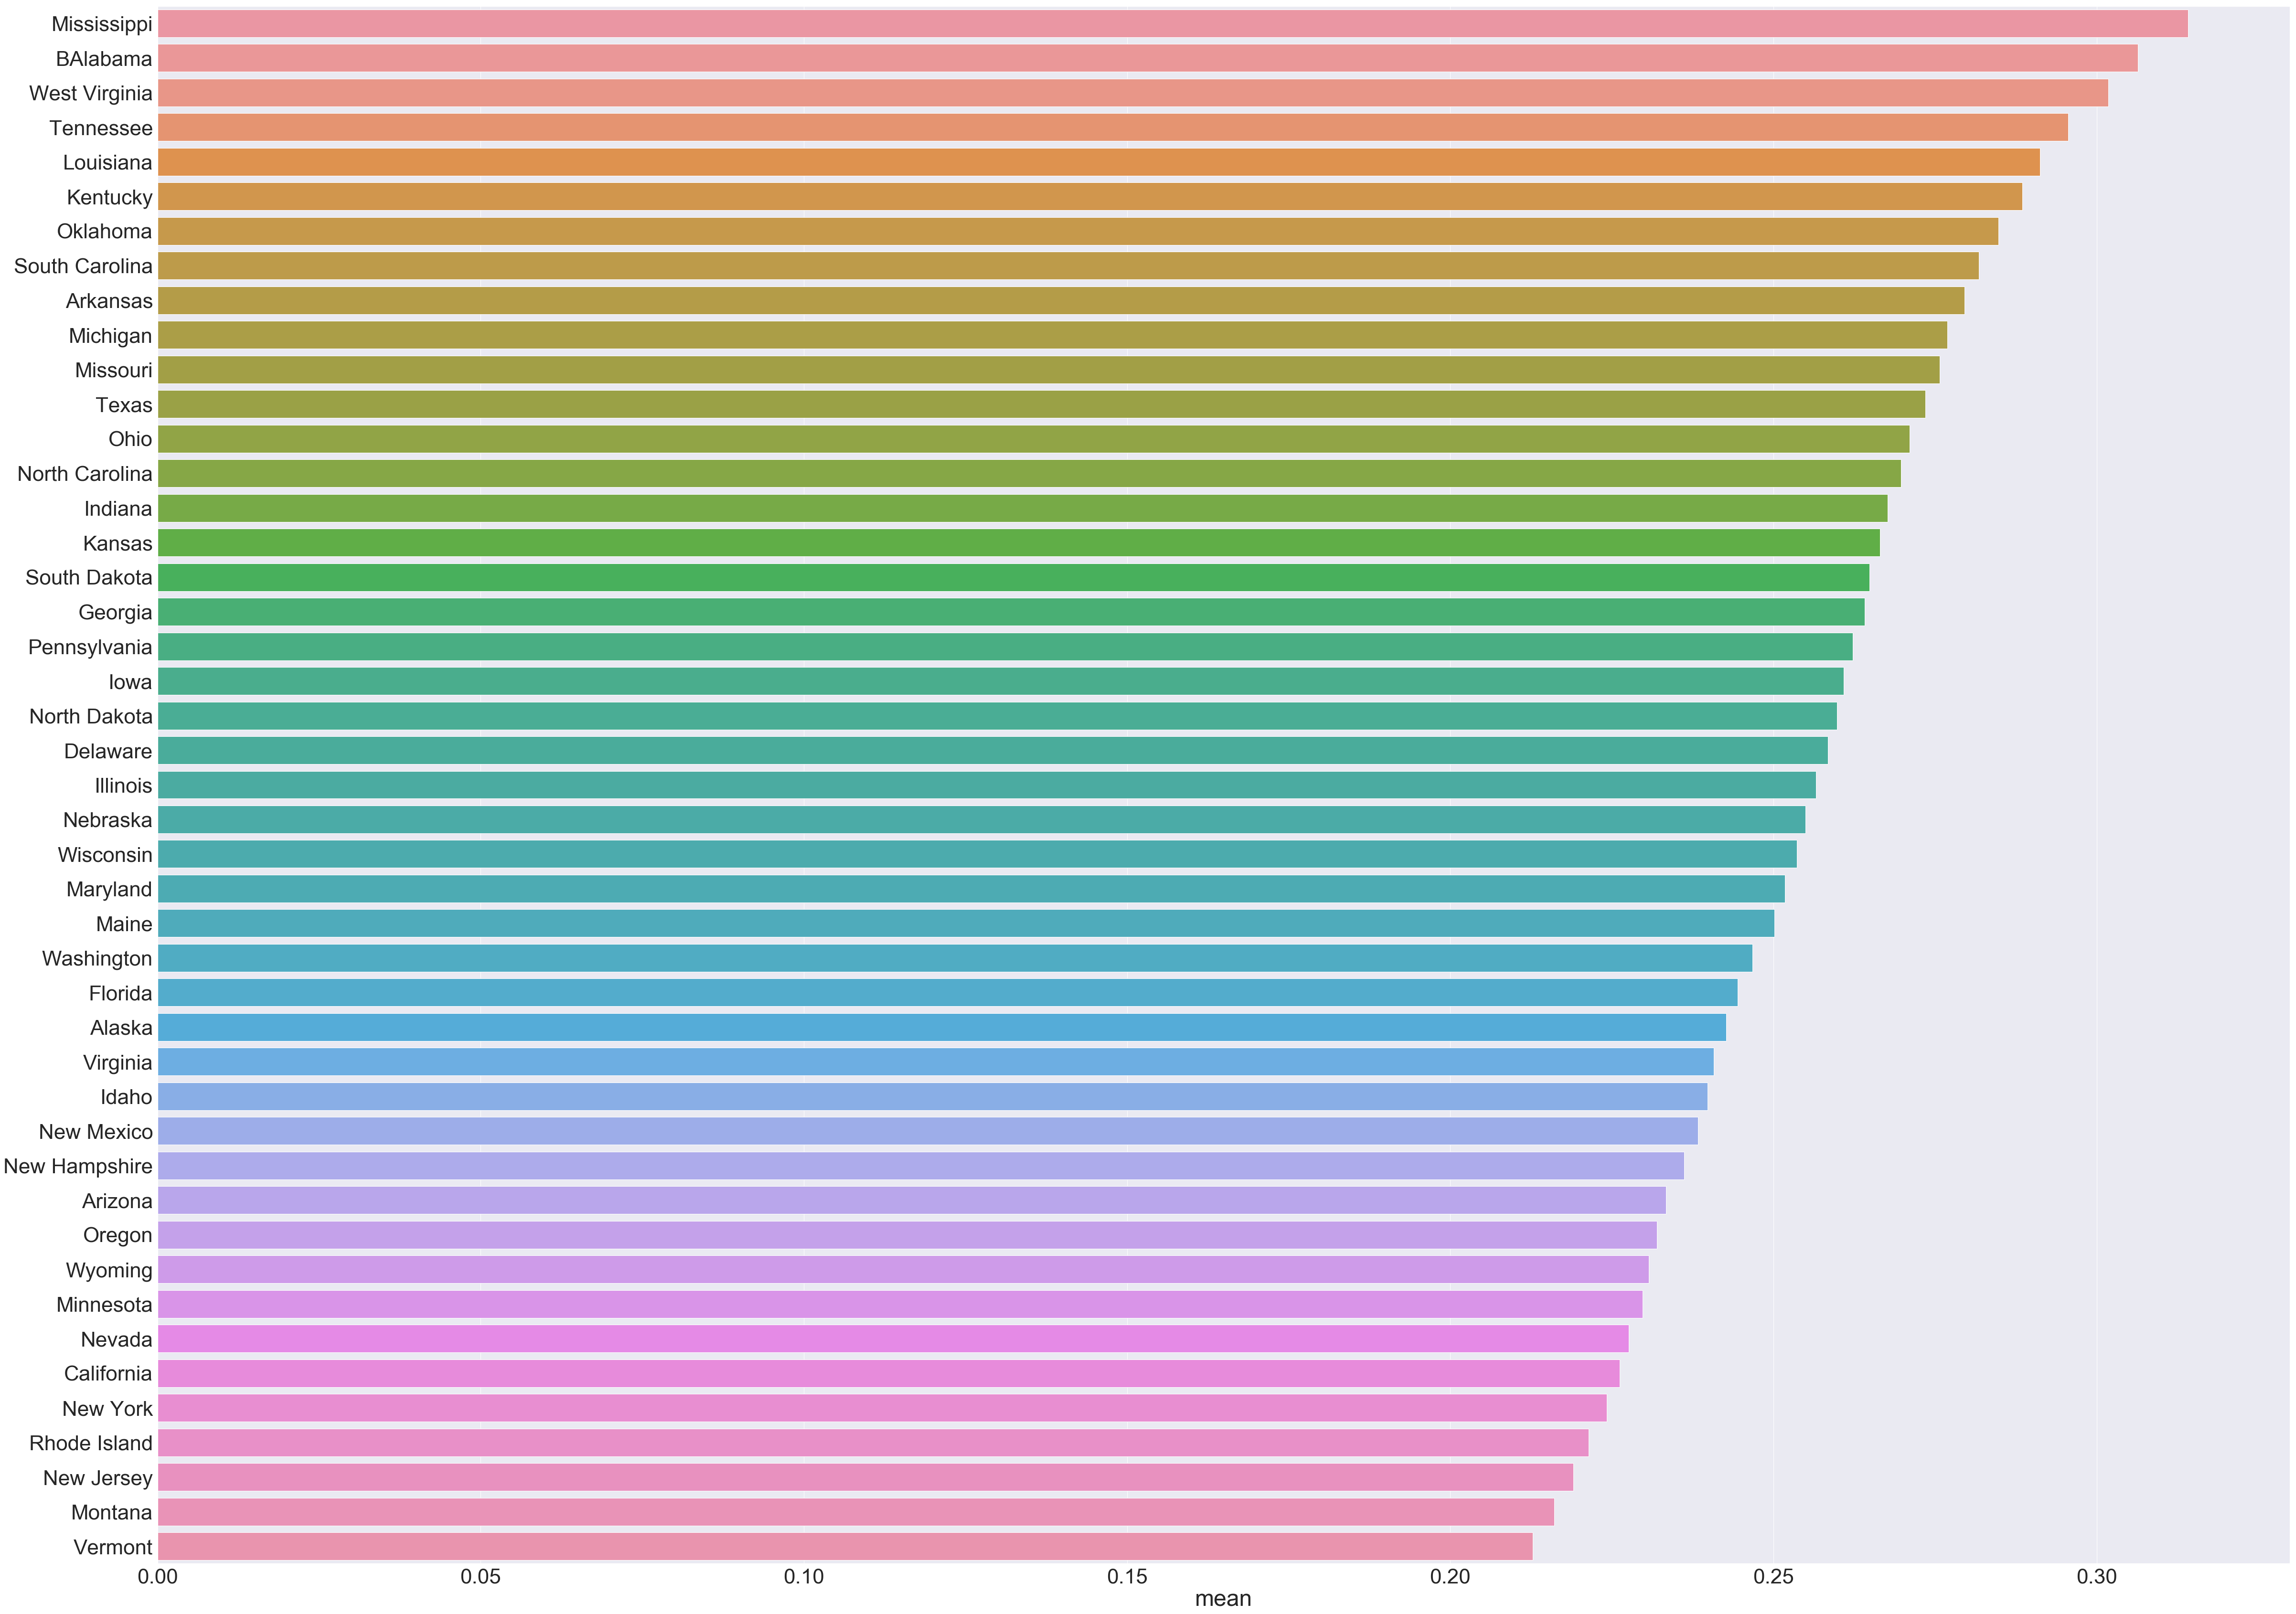

In [48]:
# Obesity data visualization 
sns.barplot(y = stats.index, x = stats['mean'], data = stats)
sns.set(rc={'figure.figsize':(80,60)})
sns.set(font_scale=4)

In [32]:
## 
##
years = np.array([1995, 2000, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])
for i in years:
    exec("data_"+str(i)+" = income_summary[['state', '"+str(i)+"']]")
    exec("data_"+str(i)+" = data_"+str(i)+".rename(index=str, columns={'"+str(i)+"':'income'})")
    exec("data_"+str(i)+" = pd.merge(data_"+str(i)+", obesity_summary[['state','"+str(i)+"']], on=('state'))")
    exec("data_"+str(i)+" = data_"+str(i)+".rename(index=str, columns={'"+str(i)+"':'obesity'})")
    exec("data_"+str(i)+" = pd.merge(data_"+str(i)+", health_summary[['state','"+str(i)+"']], on=('state'))")
    exec("data_"+str(i)+" = data_"+str(i)+".rename(index=str, columns={'"+str(i)+"':'health_cost'})")
    exec("data_"+str(i)+"['health/income'] = data_"+str(i)+"['health_cost']/data_"+str(i)+"['income']")
    exec("data_"+str(i)+".dropna()")


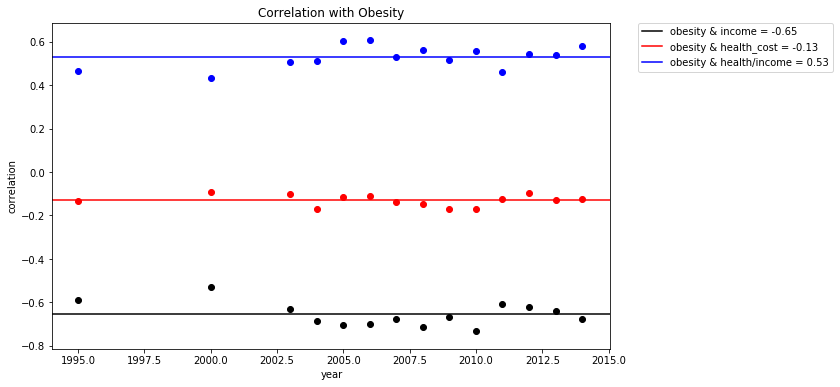

In [34]:
for i in years:
    exec("corr_"+str(i)+" = data_"+str(i)+".corr()")
    #print("the correlation tabel for {}.".format(i))
    #exec("print(corr_"+str(i)+")")
ax = plt.figure(figsize=(10,6))
plt.title('Correlation with Obesity')
tot_year = len(years)
inc_obs = 0
hea_obs = 0
hea_inc_obs = 0
for i in years:
    exec("plt.scatter("+str(i)+", corr_"+str(i)+"['income']['obesity'], color='black')")
    exec("inc_obs += corr_"+str(i)+"['income']['obesity']/tot_year")
    exec("plt.scatter("+str(i)+", corr_"+str(i)+"['health_cost']['obesity'], color='red')")
    exec("hea_obs += corr_"+str(i)+"['health_cost']['obesity']/tot_year")
    exec("plt.scatter("+str(i)+", corr_"+str(i)+"['health/income']['obesity'], color='blue')")
    exec("hea_inc_obs += corr_"+str(i)+"['health/income']['obesity']/tot_year")
plt.axhline(inc_obs, color='black', label = 'obesity & income = {0:.{1}f}'.format(inc_obs, 2))
plt.axhline(hea_obs, color='red', label = 'obesity & health_cost = {0:.{1}f}'.format(hea_obs, 2))
plt.axhline(hea_inc_obs, color = 'blue', label = 'obesity & health/income = {0:.{1}f}'.format(hea_inc_obs, 2))
#plt.scatter(2013, corr_2013['income']['obesity'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('year');
plt.ylabel('correlation');

(0.06398026315789473, 0.18608130537438344)

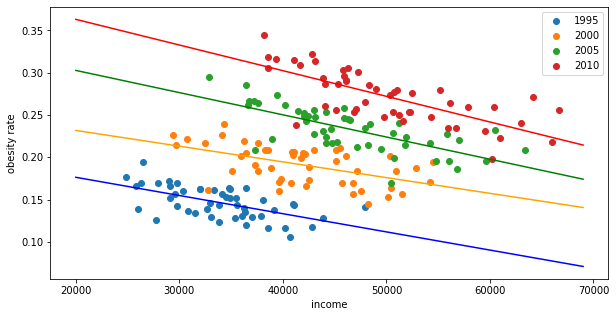

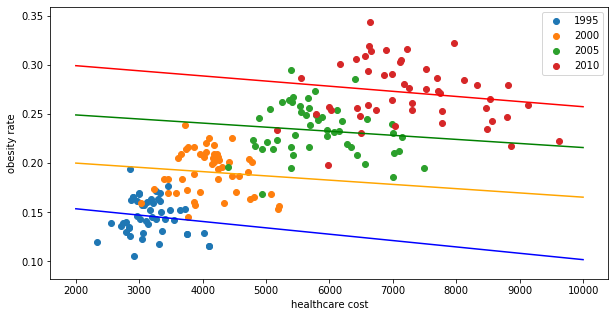

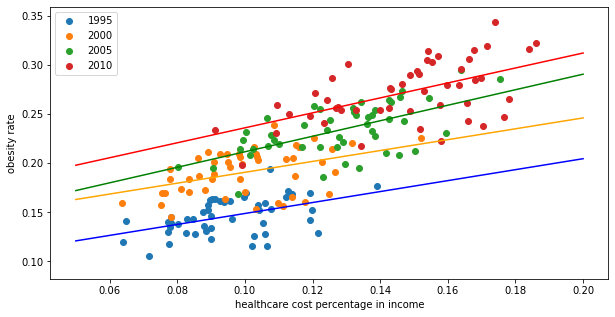

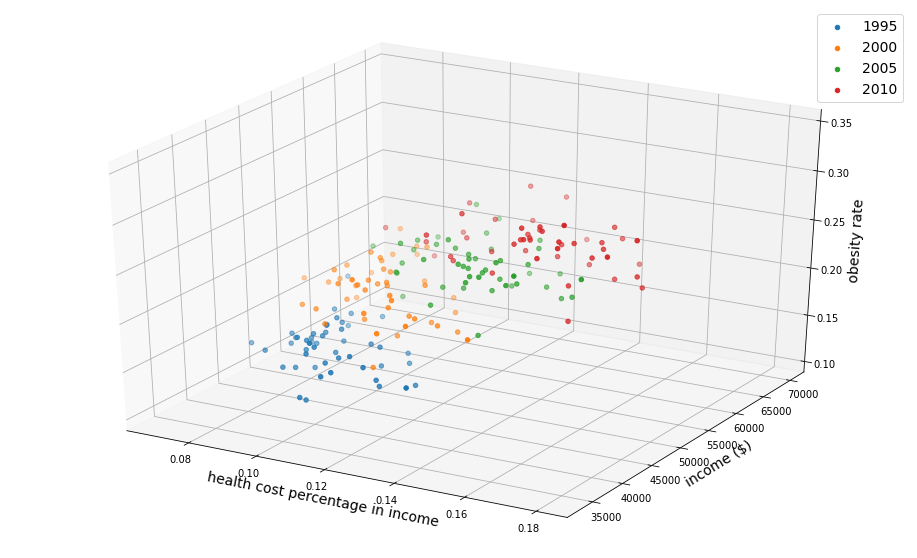

In [35]:
#
#  There is a weak correlation between the obesity rate and the percentage of healthcare in income
#
##plot data
plt.figure(figsize = [10, 5])
for i in [1995, 2000, 2005, 2010]:
    exec("plt.scatter(data_"+str(i)+"['income'], data_"+str(i)+"['obesity'], label = '"+str(i)+"')")

##plot fitting
line = np.arange(20000, 70000, 1000)
a, b = np.polyfit(data_1995['income'], data_1995['obesity'], 1)
plt.plot(line, line * a + b, '-b',)
a, b = np.polyfit(data_2000['income'], data_2000['obesity'], 1)
plt.plot(line, line * a + b, '-', color = 'orange')
a, b = np.polyfit(data_2005['income'], data_2005['obesity'], 1)
plt.plot(line, line * a + b, '-g',)
a, b = np.polyfit(data_2010['income'], data_2010['obesity'], 1)
plt.plot(line, line * a + b, '-r',)
plt.legend()
plt.xlabel('income')
plt.ylabel('obesity rate')

plt.figure(figsize = [10, 5])
plt.scatter(data_1995['health_cost'], data_1995['obesity'], label = '1995')
plt.scatter(data_2000['health_cost'], data_2000['obesity'], label = '2000')
plt.scatter(data_2005['health_cost'], data_2005['obesity'], label = '2005')
plt.scatter(data_2010['health_cost'], data_2010['obesity'], label = '2010')

#plot fitting
line = np.arange(2000, 11000, 1000)
a, b = np.polyfit(data_1995['health_cost'], data_1995['obesity'], 1)
plt.plot(line, line * a + b, '-b',)
a, b = np.polyfit(data_2000['health_cost'], data_2000['obesity'], 1)
plt.plot(line, line * a + b, '-', color = 'orange')
a, b = np.polyfit(data_2005['health_cost'], data_2005['obesity'], 1)
plt.plot(line, line * a + b, '-g',)
a, b = np.polyfit(data_2010['health_cost'], data_2010['obesity'], 1)
plt.plot(line, line * a + b, '-r',)
plt.legend()
plt.xlabel('healthcare cost')
plt.ylabel('obesity rate')

plt.figure(figsize = [10, 5])
plt.scatter(data_1995['health/income'], data_1995['obesity'], label = '1995')
plt.scatter(data_2000['health/income'], data_2000['obesity'], label = '2000')
plt.scatter(data_2005['health/income'], data_2005['obesity'], label = '2005')
plt.scatter(data_2010['health/income'], data_2010['obesity'], label = '2010')
#plot fitting
line = np.arange(0.05, 0.20, 0.001)
a, b = np.polyfit(data_1995['health/income'], data_1995['obesity'], 1)
plt.plot(line, line * a + b, '-b',)
a, b = np.polyfit(data_2000['health/income'], data_2000['obesity'], 1)
plt.plot(line, line * a + b, '-', color = 'orange')
a, b = np.polyfit(data_2005['health/income'], data_2005['obesity'], 1)
plt.plot(line, line * a + b, '-g',)
a, b = np.polyfit(data_2010['health/income'], data_2010['obesity'], 1)
plt.plot(line, line * a + b, '-r',)
plt.legend()
plt.xlabel('healthcare cost percentage in income')
plt.ylabel('obesity rate')

fig = plt.figure(figsize= [10*1.618, 10])
ax = plt.axes(projection='3d')
ax.scatter3D((data_1995['health/income']), data_1995['income']*1.02**15, data_1995['obesity'], label = "1995")
ax.scatter3D((data_2000['health/income']), data_2000['income']*1.02**10, data_2000['obesity'], label = "2000")
ax.scatter3D((data_2005['health/income']), data_2005['income']*1.02**5, data_2005['obesity'], label = "2005")
ax.scatter3D((data_2010['health/income']), data_2010['income']*1.02**0, data_2010['obesity'], label = "2010")
ax.set_xlabel('health cost percentage in income ', fontsize = 14)
ax.set_ylabel('income ($)', fontsize = 14)
ax.set_zlabel('obesity rate', fontsize = 14);
ax.legend(fontsize = 14)
ax.set_xlim([min(data_1995['health/income']), max(data_2010['health/income']) ])

In the linear regression model to predict obesity rate, the coefficient for each elements are:
For the percentage of healthcare cost in income is 1.70
For the income is 0.0000021
For the healthcare cost is -0.000031
For the year cost is 0.01


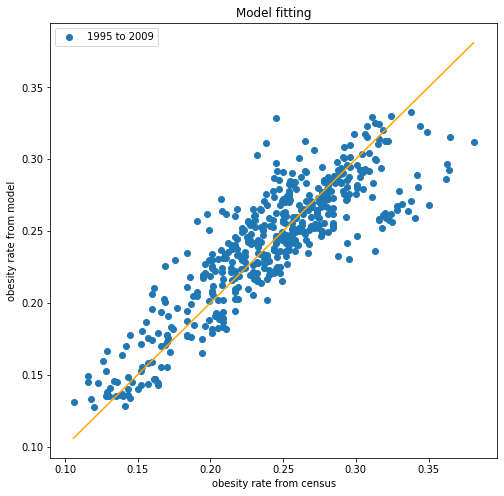

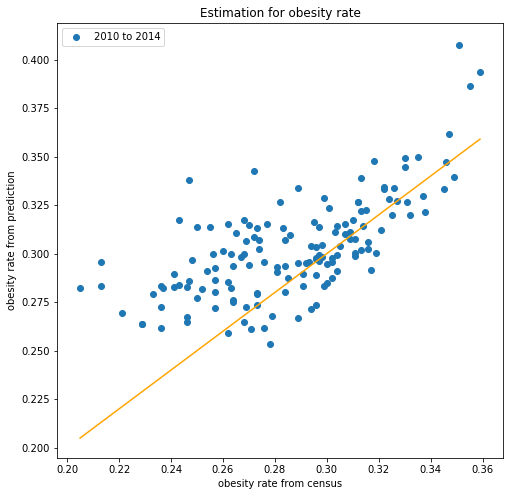

In [49]:
##Fitting the model with the data from 1995 to 2011
for i in years:
    exec("data_"+str(i)+"['year'] = "+str(i))
    exec("a"+str(i)+" = np.array(data_"+str(i)+"[['health/income','income','health_cost', 'year']])");
fit_mat = np.array([a1995, a2000, a2003, a2005, a2006, a2007, a2008, a2009, a2010, a2011]).reshape((49*10, 4))
obs_mat = np.array([data_1995['obesity'], data_2000['obesity'], data_2003['obesity'], data_2005['obesity'], data_2006['obesity'], data_2007['obesity'], data_2008['obesity'], data_2009['obesity'], data_2010['obesity'], data_2011['obesity']]).reshape((49*10, 1))
result = LinearRegression().fit(fit_mat, obs_mat)
prediction_1995_2011 = result.predict(fit_mat)

##Prediction with the model for 2012 to 2014
pred_mat = np.array([a2012, a2013, a2014]).reshape((49*3, 4))
real_obs_mat = np.array([data_2012['obesity'], data_2013['obesity'], data_2014['obesity']]).reshape((49*3, 1))
prediction_2012_2014 = result.predict(pred_mat)

print('In the linear regression model to predict obesity rate, the coefficient for each elements are:')
print('For the percentage of healthcare cost in income is {0:.{1}f}'.format(result.coef_[0,0],2))
print('For the income is {0:.{1}f}'.format(result.coef_[0,1],7))
print('For the healthcare cost is {0:.{1}f}'.format(result.coef_[0,2],6))
print('For the year cost is {0:.{1}f}'.format(result.coef_[0,3],2))


## Visualize the estimation and prediction
plt.figure(figsize = [8, 8])
plt.title('Model fitting')
x_line = np.linspace(min(obs_mat), max(obs_mat))
plt.plot(x_line, x_line, color = 'orange')
plt.scatter(obs_mat, prediction_1995_2011, label = '1995 to 2009')
plt.xlabel('obesity rate from census')
plt.ylabel('obesity rate from model')
plt.legend()

plt.figure(figsize = [8, 8])
plt.title('Estimation for obesity rate')
x_line = np.linspace(min(real_obs_mat), max(real_obs_mat))
plt.plot(x_line, x_line, color = 'orange')
plt.scatter(real_obs_mat, prediction_2012_2014, label = '2010 to 2014')
plt.xlabel('obesity rate from census')
plt.ylabel('obesity rate from prediction')
plt.legend()



Include cells that describe the steps in your data analysis.

## Obesity and Healthcare Data Cleaning

### Load Data and Trim

In [7]:
healthcare = pd.read_csv('healthcare/healthcare_in_one.csv')
obesity = pd.read_csv('obesity_rate.csv')

healthcare = healthcare.drop(['2002','2001','1999','1998','1997','1996','1994','1993','1992','1991'], axis = 1)
obesity = obesity.drop(['2017','2016','2015','1990'], axis = 1)

obesity.rename(columns={'States': 'state'}, inplace = True)

## Merge Data

##### 2014

In [11]:
hc2014 = healthcare[['state', '2014']]
ob2014 = obesity[['state', '2014']]

temp = pd.merge(hc2014, ob2014, on = 'state')
temp.rename(columns = {'2014_x': 'healthcare', '2014_y': 'obesity'}, inplace = True)
df = temp
df

,state,healthcare,obesity
0,Alaska,11064,0.289
1,Arizona,6452,0.277
2,Arkansas,7408,0.322
3,California,7549,0.270
4,Colorado,6804,0.213
5,Connecticut,9859,0.221
6,Delaware,10254,0.302
7,District of Columbia,11944,0.217
8,Florida,8076,0.289
9,Georgia,6587,0.307


##### 2013

In [12]:
hc2013 = healthcare[['state', '2013']]
ob2013 = obesity[['state', '2013']]

temp = pd.merge(hc2013, ob2013, on = 'state')
temp.rename(columns = {'2013_x': 'healthcare', '2013_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)


##### 2012

In [13]:
hc2012 = healthcare[['state', '2012']]
ob2012 = obesity[['state', '2012']]

temp = pd.merge(hc2012, ob2012, on = 'state')
temp.rename(columns = {'2012_x': 'healthcare', '2012_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

##### 2011

In [14]:
hc2011 = healthcare[['state', '2011']]
ob2011 = obesity[['state', '2011']]

temp = pd.merge(hc2011, ob2011, on = 'state')
temp.rename(columns = {'2011_x': 'healthcare', '2011_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

##### 2010

In [15]:
hc2010 = healthcare[['state', '2010']]
ob2010 = obesity[['state', '2010']]

temp = pd.merge(hc2010, ob2010, on = 'state')
temp.rename(columns = {'2010_x': 'healthcare', '2010_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)


##### 2009

In [16]:
hc2009 = healthcare[['state', '2009']]
ob2009 = obesity[['state', '2009']]

temp = pd.merge(hc2009, ob2009, on = 'state')
temp.rename(columns = {'2009_x': 'healthcare', '2009_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)


##### 2008

In [17]:
hc2008 = healthcare[['state', '2008']]
ob2008 = obesity[['state', '2008']]

temp = pd.merge(hc2008, ob2008, on = 'state')
temp.rename(columns = {'2008_x': 'healthcare', '2008_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

##### 2007

In [18]:
hc2007 = healthcare[['state', '2007']]
ob2007 = obesity[['state', '2007']]

temp = pd.merge(hc2007, ob2007, on = 'state')
temp.rename(columns = {'2007_x': 'healthcare', '2007_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)


##### 2006

In [19]:
hc2006 = healthcare[['state', '2006']]
ob2006 = obesity[['state', '2006']]

temp = pd.merge(hc2006, ob2006, on = 'state')
temp.rename(columns = {'2006_x': 'healthcare', '2006_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

#### 2005

In [20]:
hc2005 = healthcare[['state', '2005']]
ob2005 = obesity[['state', '2005']]

temp = pd.merge(hc2005, ob2005, on = 'state')
temp.rename(columns = {'2005_x': 'healthcare', '2005_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)


##### 2004

In [21]:
hc2004 = healthcare[['state', '2004']]
ob2004 = obesity[['state', '2004']]

temp = pd.merge(hc2004, ob2004, on = 'state')
temp.rename(columns = {'2004_x': 'healthcare', '2004_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)


##### 2003

In [22]:
hc2003 = healthcare[['state', '2003']]
ob2003 = obesity[['state', '2003']]

temp = pd.merge(hc2003, ob2003, on = 'state')
temp.rename(columns = {'2003_x': 'healthcare', '2003_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)


##### 2000

In [23]:
hc2000 = healthcare[['state', '2000']]
ob2000 = obesity[['state', '2000']]

temp = pd.merge(hc2000, ob2000, on = 'state')
temp.rename(columns = {'2000_x': 'healthcare', '2000_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)
df

,state,healthcare,obesity
0,Alaska,11064,0.289
1,Arizona,6452,0.277
2,Arkansas,7408,0.322
3,California,7549,0.270
4,Colorado,6804,0.213
5,Connecticut,9859,0.221
6,Delaware,10254,0.302
7,District of Columbia,11944,0.217
8,Florida,8076,0.289
9,Georgia,6587,0.307


##### 1995

In [26]:
hc1995 = healthcare[['state', '1995']]
ob1995 = obesity[['state', '1995']]

temp = pd.merge(hc1995, ob1995, on = 'state')
temp.rename(columns = {'1995_x': 'healthcare', '1995_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

C:\Users\99716\.julia\conda\3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,healthcare,obesity,state,year
0,11064,0.289,Alaska,1995
1,6452,0.277,Arizona,1995
2,7408,0.322,Arkansas,1995
3,7549,0.270,California,1995
4,6804,0.213,Colorado,1995
5,9859,0.221,Connecticut,1995
6,10254,0.302,Delaware,1995
7,11944,0.217,District of Columbia,1995
8,8076,0.289,Florida,1995
9,6587,0.307,Georgia,1995


## Check if there are errors in the data

- df.isnull().values.any() 

needs to ouput "False" in order to comfirm that
there are no null values in the dataframe

In [21]:
df.isnull().values.any()

True

In [22]:
df.shape

(700, 3)

In [23]:
df = df.dropna()
df.shape

(699, 3)

# Data Analysis & Results

## Obesity and Healthcare Analysis

In [24]:
# describe
desc = df.describe()
desc

,healthcare,obesity
count,699.000000,699.000000
mean,6409.148784,0.248491
std,1727.622834,0.050867
min,2334.000000,0.106000
25%,5319.000000,0.217000
50%,6452.000000,0.252000
75%,7515.000000,0.284000
max,11944.000000,0.381000


In [25]:
corrs = df.corr()
corrs

,healthcare,obesity
healthcare,1.000000,0.568327
obesity,0.568327,1.000000


## Data visualization

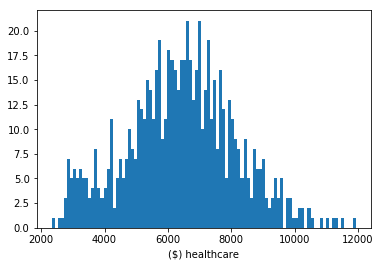

In [26]:
# healthcare
plt.hist(df['healthcare'], bins = 100)
plt.xlabel('($) healthcare')
hc = plt.gcf()

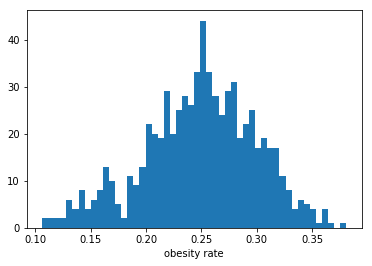

In [27]:
# obesity
plt.hist(df['obesity'], bins = 50)
plt.xlabel('obesity rate')
ob = plt.gcf()

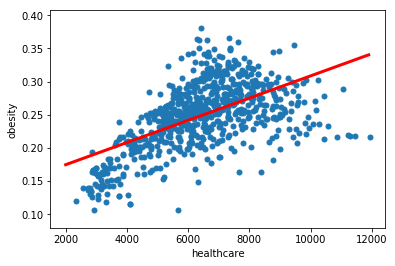

In [28]:
a, b = np.polyfit(df['healthcare'], df['obesity'], 1)
pred = np.add(np.multiply(np.arange(2000, 12000, 100), a), b)

plt.scatter(df['healthcare'], df['obesity'], s = 25)
plt.plot(np.arange(2000, 12000, 100), pred, '-r', linewidth = 3)
plt.xlabel('healthcare')
plt.ylabel('obesity')

result = plt.gcf()

In [29]:

x = pd.DataFrame(df['healthcare'])
y = pd.DataFrame(df['obesity'])

model = LinearRegression()
model.fit(x, y)

print(model.coef_)

[[1.67335747e-05]]


## Obesity and Income

### Load Data and Trim

In [30]:
income = pd.read_csv('household_income/Summary_2017_1984.csv')
obesity = pd.read_csv('obesity_rate.csv')

income = income.drop(['1984','1985','1986','1987','1988','1989'], axis = 1)
income = income.drop(['2001','2002','1999','1998','1997','1996'], axis = 1)
income = income.drop(['1994','1993','1992','1991','2013.1'], axis = 1)

obesity.rename(columns = {'States': 'State'}, inplace = True)


### Merge Data

##### 1900 - 2017

In [31]:
# 2017
ic2017 = income[['State', '2017']]
ob2017 = obesity[['State', '2017']]

temp = pd.merge(ic2017, ob2017, on = 'State')
temp.rename(columns = {'2017_x': 'income', '2017_y': 'obesity'}, inplace = True)
df = temp

# 2016
ic2016 = income[['State', '2016']]
ob2016 = obesity[['State', '2016']]

temp = pd.merge(ic2016, ob2016, on = 'State')
temp.rename(columns = {'2016_x': 'income', '2016_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 2015
ic2015 = income[['State', '2015']]
ob2015 = obesity[['State', '2015']]

temp = pd.merge(ic2015, ob2015, on = 'State')
temp.rename(columns = {'2015_x': 'income', '2015_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 2014
ic2014 = income[['State', '2014']]
ob2014 = obesity[['State', '2014']]

temp = pd.merge(ic2014, ob2014, on = 'State')
temp.rename(columns = {'2014_x': 'income', '2014_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 2013
ic2013 = income[['State', '2013']]
ob2013 = obesity[['State', '2013']]

temp = pd.merge(ic2013, ob2013, on = 'State')
temp.rename(columns = {'2013_x': 'income', '2013_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 2012
ic2012 = income[['State', '2012']]
ob2012 = obesity[['State', '2012']]

temp = pd.merge(ic2012, ob2012, on = 'State')
temp.rename(columns = {'2012_x': 'income', '2012_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 2011
ic2011 = income[['State', '2011']]
ob2011 = obesity[['State', '2011']]

temp = pd.merge(ic2011, ob2011, on = 'State')
temp.rename(columns = {'2011_x': 'income', '2011_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 2010
ic2010 = income[['State', '2010']]
ob2010 = obesity[['State', '2010']]

temp = pd.merge(ic2010, ob2010, on = 'State')
temp.rename(columns = {'2010_x': 'income', '2010_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 2009
ic2009 = income[['State', '2009']]
ob2009 = obesity[['State', '2009']]

temp = pd.merge(ic2009, ob2009, on = 'State')
temp.rename(columns = {'2009_x': 'income', '2009_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 2008
ic2008 = income[['State', '2008']]
ob2008 = obesity[['State', '2008']]

temp = pd.merge(ic2008, ob2008, on = 'State')
temp.rename(columns = {'2008_x': 'income', '2008_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 2007
ic2007 = income[['State', '2007']]
ob2007 = obesity[['State', '2007']]

temp = pd.merge(ic2007, ob2007, on = 'State')
temp.rename(columns = {'2007_x': 'income', '2007_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 2006
ic2006 = income[['State', '2006']]
ob2006 = obesity[['State', '2006']]

temp = pd.merge(ic2006, ob2006, on = 'State')
temp.rename(columns = {'2006_x': 'income', '2006_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 2005
ic2005 = income[['State', '2005']]
ob2005 = obesity[['State', '2005']]

temp = pd.merge(ic2005, ob2005, on = 'State')
temp.rename(columns = {'2005_x': 'income', '2005_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 2004
ic2004 = income[['State', '2004']]
ob2004 = obesity[['State', '2004']]

temp = pd.merge(ic2004, ob2004, on = 'State')
temp.rename(columns = {'2004_x': 'income', '2004_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 2003
ic2003 = income[['State', '2003']]
ob2003 = obesity[['State', '2003']]

temp = pd.merge(ic2003, ob2003, on = 'State')
temp.rename(columns = {'2003_x': 'income', '2003_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 2000
ic2000 = income[['State', '2000']]
ob2000 = obesity[['State', '2000']]

temp = pd.merge(ic2000, ob2000, on = 'State')
temp.rename(columns = {'2000_x': 'income', '2000_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 1995
ic1995 = income[['State', '1995']]
ob1995 = obesity[['State', '1995']]

temp = pd.merge(ic1995, ob1995, on = 'State')
temp.rename(columns = {'1995_x': 'income', '1995_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

# 1990
ic1990 = income[['State', '1990']]
ob1990 = obesity[['State', '1990']]

temp = pd.merge(ic1990, ob1990, on = 'State')
temp.rename(columns = {'1990_x': 'income', '1990_y': 'obesity'}, inplace = True)
df = df.append(temp, ignore_index = True)

### Check if there are empty rows

- df.isnull().values.any()

needs to ouput "False" in order to comfirm that
there are no null values in the dataframe

In [32]:
df.isnull().values.any()

True

In [33]:
df.shape

(882, 3)

In [34]:
df = df.dropna()
df.shape

(876, 3)

In [35]:
df.income = [x.replace(',','') for x in df.income]
df.income = df.income.astype(float)

### Analysis

In [36]:
# describe
desc = df.describe()
desc

,income,obesity
count,876.000000,876.000000
mean,48962.697489,0.250919
std,10907.084226,0.060100
min,20178.000000,0.069000
25%,41881.000000,0.218000
50%,48453.000000,0.256000
75%,56218.750000,0.294000
max,81084.000000,0.381000


In [37]:
corrs = df.corr()
corrs

,income,obesity
income,1.000000,0.378533
obesity,0.378533,1.000000


### Data Visualization

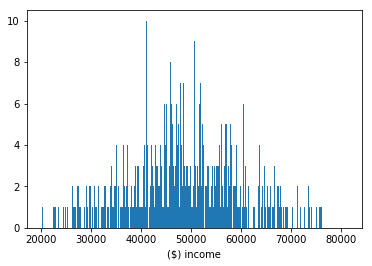

In [38]:
# income
plt.hist(df['income'], bins = 610)
plt.xlabel('($) income')
ic = plt.gcf()

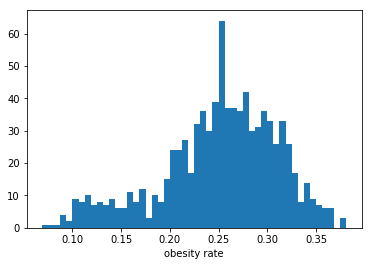

In [39]:
# obesity
plt.hist(df['obesity'], bins = 50)
plt.xlabel('obesity rate')
ob = plt.gcf()


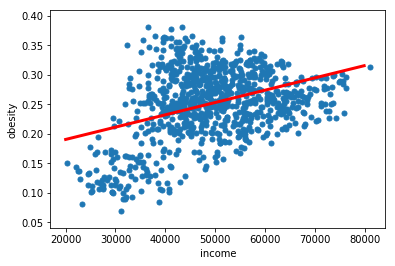

In [40]:
a, b = np.polyfit(df['income'], df['obesity'], 1)
pred = np.add(np.multiply(np.arange(20000, 80000, 100), a), b)

plt.scatter(df['income'], df['obesity'], s = 25)
plt.plot(np.arange(20000, 80000, 100), pred, '-r', linewidth = 3)
plt.xlabel('income')
plt.ylabel('obesity')

result = plt.gcf()

In [41]:
x = pd.DataFrame(df['income'])
y = pd.DataFrame(df['obesity'])

model = LinearRegression()
model.fit(x, y)

print(model.coef_)

[[2.08578786e-06]]


# Ethics & Privacy

The obesity dataset is provided by Disease Control and Prevention and was obtained by administering a cross-sectional telephone survey with a standardized questionnaire. The dataset may have a bias for people who only have a phone, and miss those who do not. It may also miss people who can refuse being surveyed, including those who monitor calls on an answering machine and don't answer telephone surveyors. 

The healthcare expenses dataset is from the US. Centers for Medicare & Medicaid Services. The data was obtained through a multi-step process involving three steps. The first step was gathering data from service providers by state, including hospital care, dental care, physician and clinical services, and home health care from the Economical Census. The Economical Census is a mandatory survey sent to businesses and conducted by the Census Bureau to measure the nation’s businesses and economy. The second major step is obtaining data sourced from public program administrative data such as Medicare, Medicaid, and Private Health Insurance. 

The income information dataset is from the Census Bureau, and was obtained through the American Community Survey. All datasets based on survey results were administered by government departments and are legally bound to strict confidentiality requirements, ensuring that identities would not be revealed. We do not need to use Safe Harbor Methods to remove personal data because the data does not contain any. 

Potential consequences of our data analysis may be that private insurance companies may more actively target consumers based on health measures such as obesity to seek more profitable outcomes. 



# Conclusion & Discussion

    The correlation table of 1995, 2000, 2005 and 2010 indicated a correlation between income and obesity rate as approximately -0.6. A negative relationship is revealed from the graph of income versus obesity rate in each of these years, which supports our hypothesis. From the same table, we found that the correlation between healthcare costs and obesity is approximately -0.1, which is relatively trivial. From the graph of healthcare cost and obesity, we observed a strong deviation of data points from the line of linear fitting as well. However, the percentage of healthcare costs in income has a stronger positive relationship with obesity in 49 states in 1995, 2000, 2005 and 2010. We observed a positive correlation between the percentage of healthcare in income and obesity rates from 1995 to 2010 from the correlation table. 

    From our data analysis and visualization, we found that there was a negative correlation between income and obesity rate, which agrees with our hypothesis. However, we also noticed that the higher the percentage of healthcare in income, the higher the obesity rate. Instead of interpreting a causal relationship between income, healthcare and obesity rate, our analysis showed correlations between income and healthcare versus obesity rate respectively.  
